In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import silhouette_score
import seaborn as sns

In [5]:
# A -  Open and read dataset upto 5 rows
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [34]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## B Drop customerid column and plot boxplot for remaining columns

In [7]:
# Dropping column
df.drop(columns='CustomerID',inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
df_numeric = df.select_dtypes(include = np.number)
df_numeric

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Boxplot for column Age


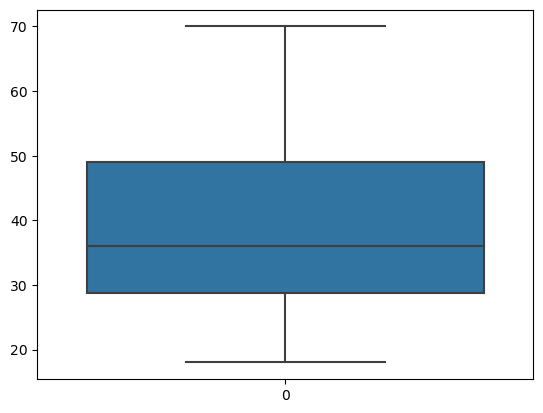

Boxplot for column Annual Income (k$)


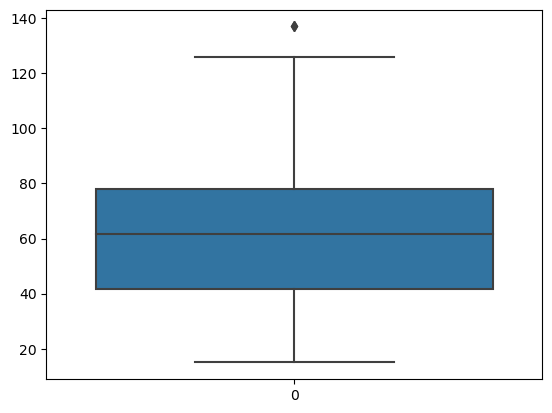

Boxplot for column Spending Score (1-100)


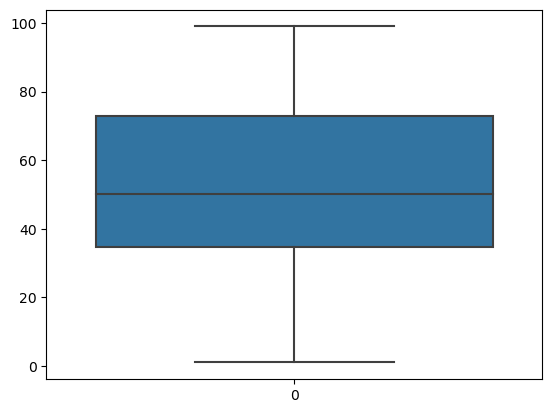

In [17]:
# Boxplot
for i in df_numeric:
    print('Boxplot for column',i)
    sns.boxplot(data=df_numeric[i])
    plt.show()

In [ ]:
## C - Scaling and apply kmeans to plot elbow curve for k value 1-10

In [21]:
pt = PowerTransformer()
df_scaled = pt.fit_transform(df_numeric)
df_scaled

array([[-1.71899306e+00, -1.98992980e+00, -3.85307505e-01],
       [-1.47000195e+00, -1.98992980e+00,  1.16446697e+00],
       [-1.59191222e+00, -1.93036620e+00, -1.82042446e+00],
       [-1.24001951e+00, -1.93036620e+00,  1.02354921e+00],
       [-4.61117950e-01, -1.87203193e+00, -3.46102672e-01],
       [-1.35283061e+00, -1.87203193e+00,  9.88144263e-01],
       [-1.33839588e-01, -1.81483532e+00, -1.82042446e+00],
       [-1.24001951e+00, -1.81483532e+00,  1.61530777e+00],
       [ 1.58465719e+00, -1.75869594e+00, -1.98173773e+00],
       [-5.48494472e-01, -1.75869594e+00,  8.45790231e-01],
       [ 1.72131344e+00, -1.75869594e+00, -1.43390799e+00],
       [-1.33839588e-01, -1.75869594e+00,  1.78606543e+00],
       [ 1.29398344e+00, -1.70354278e+00, -1.38831737e+00],
       [-1.13123450e+00, -1.70354278e+00,  1.02354921e+00],
       [ 1.80571441e-02, -1.70354278e+00, -1.47997896e+00],
       [-1.35283061e+00, -1.70354278e+00,  1.09414646e+00],
       [-1.33839588e-01, -1.64931273e+00

In [24]:
from sklearn.cluster import KMeans
km= KMeans(random_state=11)

In [26]:
# Elbow method
Ebw_curve=[]
for i in range(1,10):
    km=KMeans(n_clusters= i)
    km.fit(df_scaled)
    Ebw_curve.append(km.inertia_)    

C:\Users\aishw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


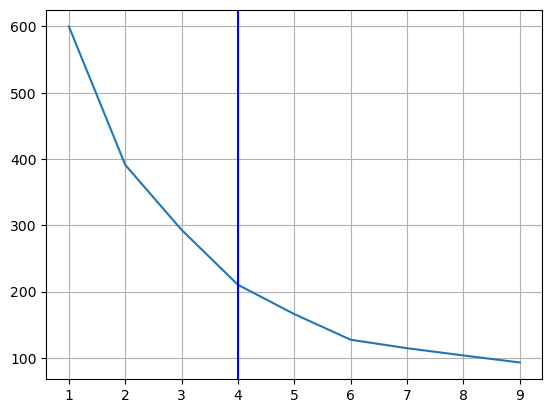

In [29]:
sns.lineplot(x=np.arange(1,10), y = Ebw_curve)
plt.axvline (x=4,color= 'b')
plt.grid(True)
plt.show()

In [ ]:
# D - Calculating Silhouette score for k value 2-10

In [32]:

from sklearn.metrics import silhouette_score
# Silhoutte method
sil_score=[]
for i in range(2,10):
    km=KMeans(n_clusters= i)
    km.fit(df_scaled)
    ss= silhouette_score(df_scaled, km.labels_)
    print('Silhoutte score for ',i,'cluster is : ',ss)
    sil_score.append(ss)

Silhoutte score for  2 cluster is :  0.33681159037545144
Silhoutte score for  3 cluster is :  0.3606232880497505
Silhoutte score for  4 cluster is :  0.40284565999528427
Silhoutte score for  5 cluster is :  0.43199861861864486
Silhoutte score for  6 cluster is :  0.4565428039109387
Silhoutte score for  7 cluster is :  0.45554113652802586
Silhoutte score for  8 cluster is :  0.4108829147996792
Silhoutte score for  9 cluster is :  0.4003475641911486


In [ ]:
# E Silhoutte Visualizer to plot  optimal K value

Silhoutte score for  2 cluster is :  0.33681159037545144


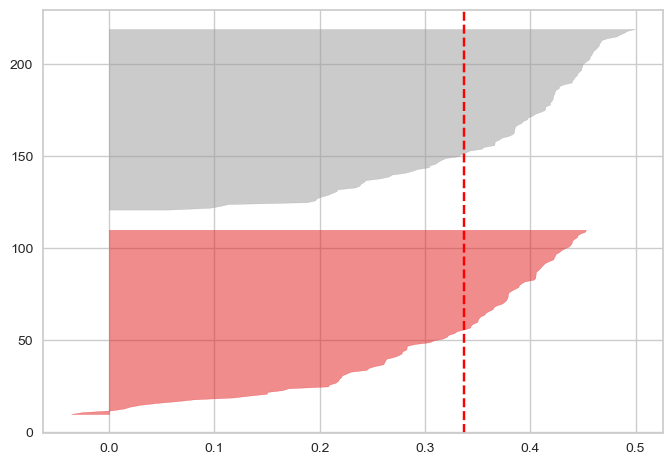

Silhoutte score for  3 cluster is :  0.3606232880497505


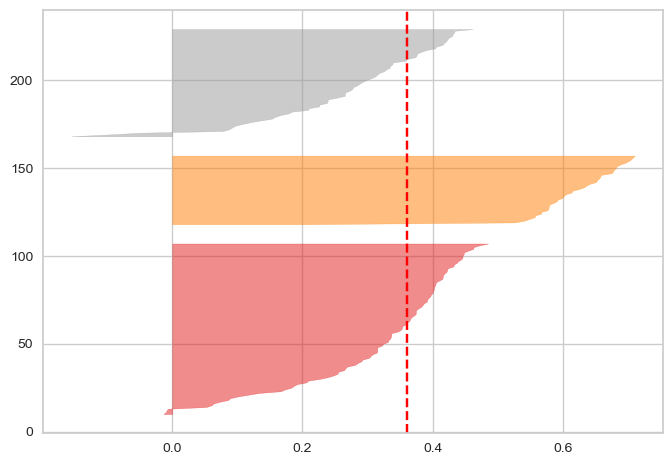

Silhoutte score for  4 cluster is :  0.4042005410190862


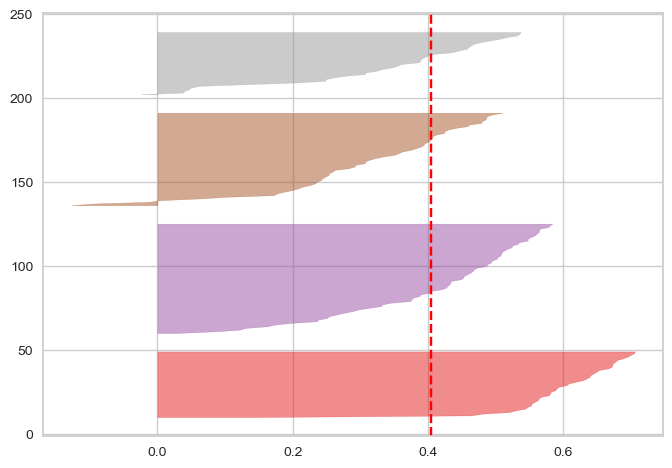

Silhoutte score for  5 cluster is :  0.43080984701949815


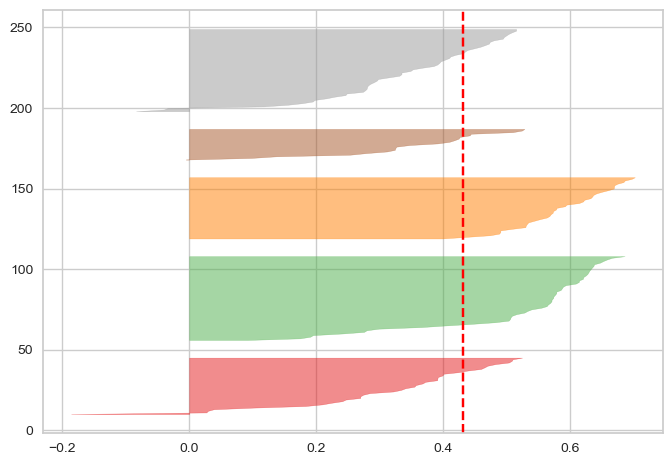

Silhoutte score for  6 cluster is :  0.4580368452253259


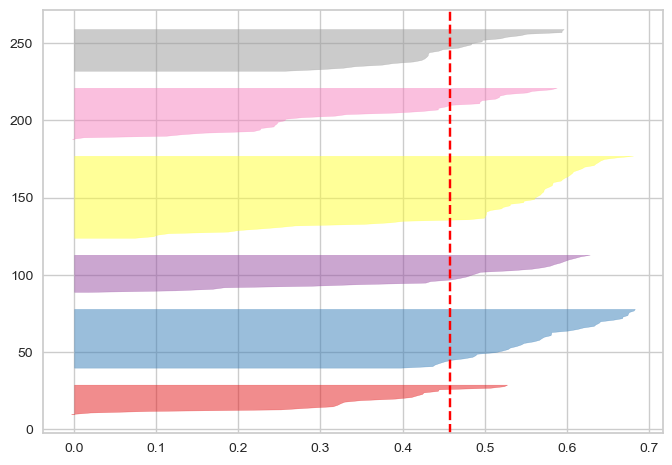

Silhoutte score for  7 cluster is :  0.44403877474145725


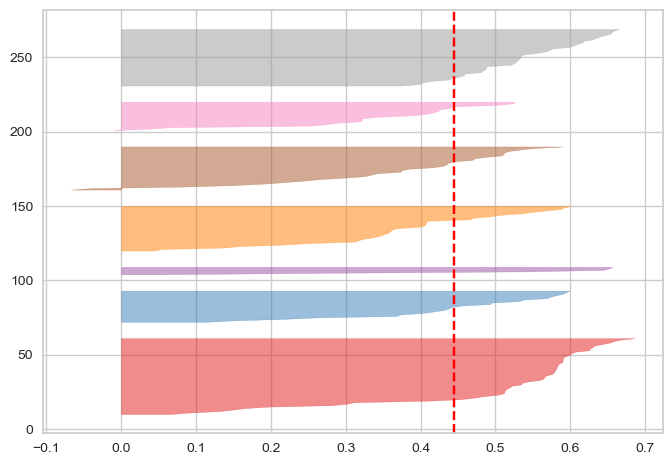

Silhoutte score for  8 cluster is :  0.39549584827409445


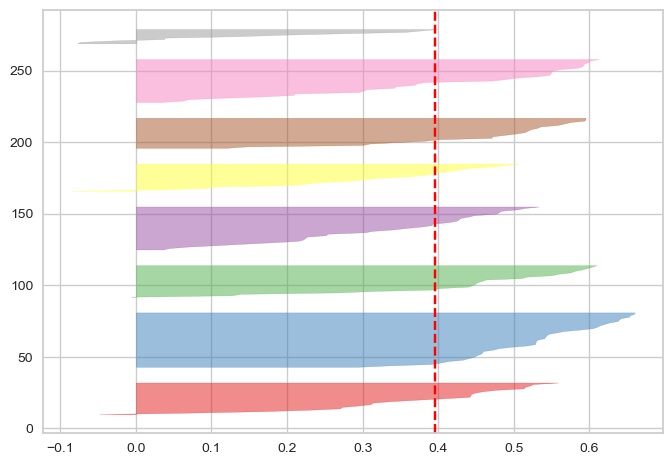

Silhoutte score for  9 cluster is :  0.40483454090463517


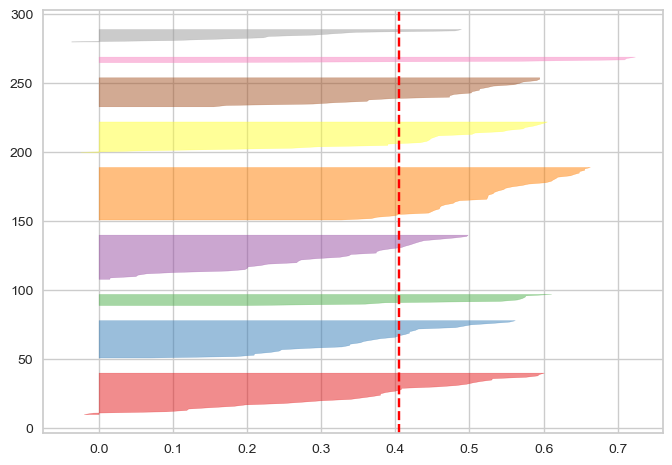

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,10):
    km=KMeans(n_clusters= i)
    km.fit(df_scaled)
    ss= silhouette_score(df_scaled, km.labels_)
    print('Silhoutte score for ',i,'cluster is : ',ss)
    sv=SilhouetteVisualizer(km)
    sv.fit(df_scaled)
    plt.show()
 